In [2]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


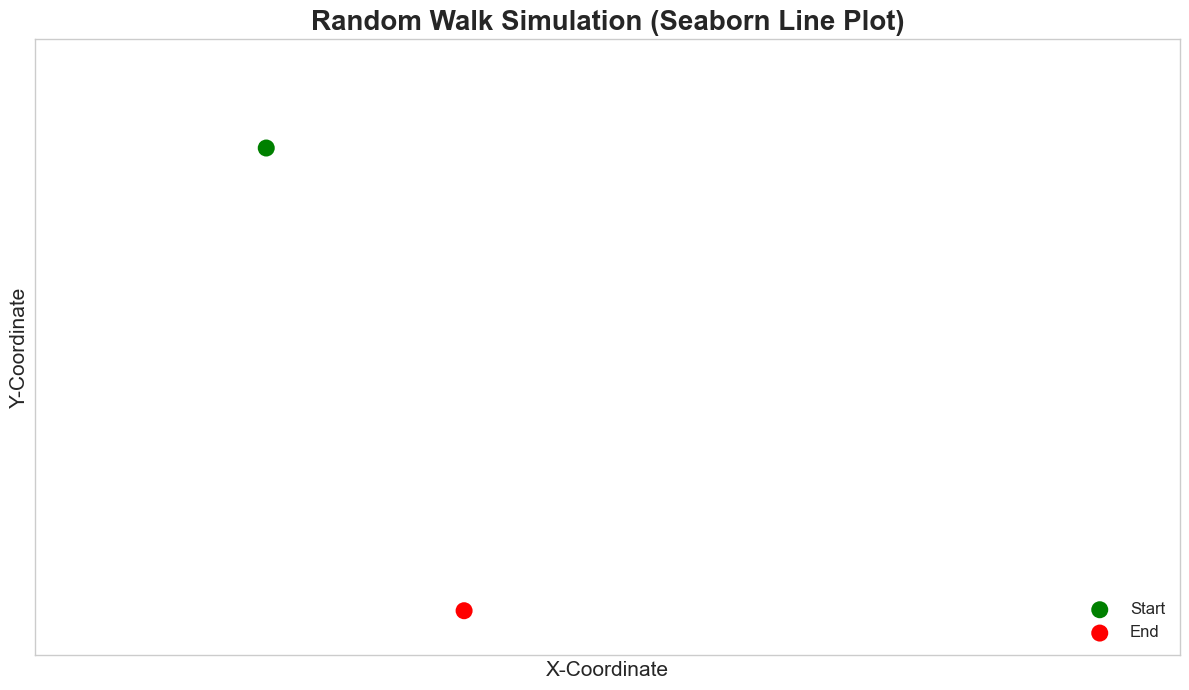

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

# --- RandomWalk Class Definition (Included for Self-Containment) ---
class RandomWalk:
    """A class to generate random walks."""

    def __init__(self, num_points=5000):
        """Initialize attributes of a walk."""
        self.num_points = num_points

        # All walks start at (0, 0).
        self.x_values = [0]
        self.y_values = [0]

    def fill_walk(self):
        """Calculate all the points in the walk."""

        # Keep taking steps until the walk reaches the desired number of points.
        while len(self.x_values) < self.num_points:
            # Decide which direction to go and how far to go in that direction.
            x_direction = random.choice([1, -1])
            x_distance = random.choice([0, 1, 2, 3, 4])
            x_step = x_direction * x_distance

            y_direction = random.choice([1, -1])
            y_distance = random.choice([0, 1, 2, 3, 4])
            y_step = y_direction * y_distance

            # Reject moves that go nowhere.
            if x_step == 0 and y_step == 0:
                continue

            # Calculate the new x and y values.
            next_x = self.x_values[-1] + x_step
            next_y = self.y_values[-1] + y_step

            self.x_values.append(next_x)
            self.y_values.append(next_y)

# --- Visualization using Seaborn's lineplot() ---

# Make a random walk.
rw = RandomWalk(20000) # Increased points for a more intricate walk
rw.fill_walk()

# Set up the plotting environment.
plt.style.use('seaborn-v0_8-whitegrid') # Using a modern seaborn style
fig, ax = plt.subplots(figsize=(12, 7))

# Create a sequence of points (useful for color mapping progression)
point_numbers = list(range(rw.num_points))

# Use Seaborn's lineplot()
# We explicitly set 'x' and 'y' and use the 'hue' parameter to color the line
# based on the point number, simulating the progression of the walk.
sns.lineplot(
    x=rw.x_values,
    y=rw.y_values,
    hue=point_numbers,
    palette="viridis", # A continuous color palette to show progression
    legend=False, # No legend needed for the continuous hue
    linewidth=1.5,
    ax=ax
)

# Emphasize the start and end points of the walk using Matplotlib's scatter.
ax.scatter(0, 0, c='green', edgecolors='none', s=150, zorder=3, label='Start')
ax.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolors='none', s=150, zorder=3, label='End')

# Configure the plot appearance
ax.set_title("Random Walk Simulation (Seaborn Line Plot)", fontsize=20, weight='bold')
ax.set_xlabel("X-Coordinate", fontsize=15)
ax.set_ylabel("Y-Coordinate", fontsize=15)

# Add a subtle grid
ax.grid(True, linestyle='--', alpha=0.6)

# Remove the default tick marks for a cleaner look of the walk itself
ax.set_xticks([])
ax.set_yticks([])

# Add a legend for start/end points if desired
ax.legend(loc='lower right', fontsize=12)

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()
